# Working with large data set

In this workshop, we will use real data imported from csv file (boston.csv) instead of made-up ones

In [1]:
# import everything we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
''' 
Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT    % lower status of the population
 MEDV     Median value of owner-occupied homes in $1000's
 '''

" \nVariables in order:\n CRIM     per capita crime rate by town\n ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n INDUS    proportion of non-retail business acres per town\n CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n NOX      nitric oxides concentration (parts per 10 million)\n RM       average number of rooms per dwelling\n AGE      proportion of owner-occupied units built prior to 1940\n DIS      weighted distances to five Boston employment centres\n RAD      index of accessibility to radial highways\n TAX      full-value property-tax rate per $10,000\n PTRATIO  pupil-teacher ratio by town\n B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\n LSTAT    % lower status of the population\n MEDV     Median value of owner-occupied homes in $1000's\n "

### Construct a dataframe for our data and target for a better illustration
### set the columns names according to the result above and show the first 5 rows

In [3]:
# Load the Boston housing dataset from CSV
df = pd.read_csv('boston.csv', index_col=0)

# Display first few rows
print("Dataset shape:", df.shape)
df.head()  

Dataset shape: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Data Visualization

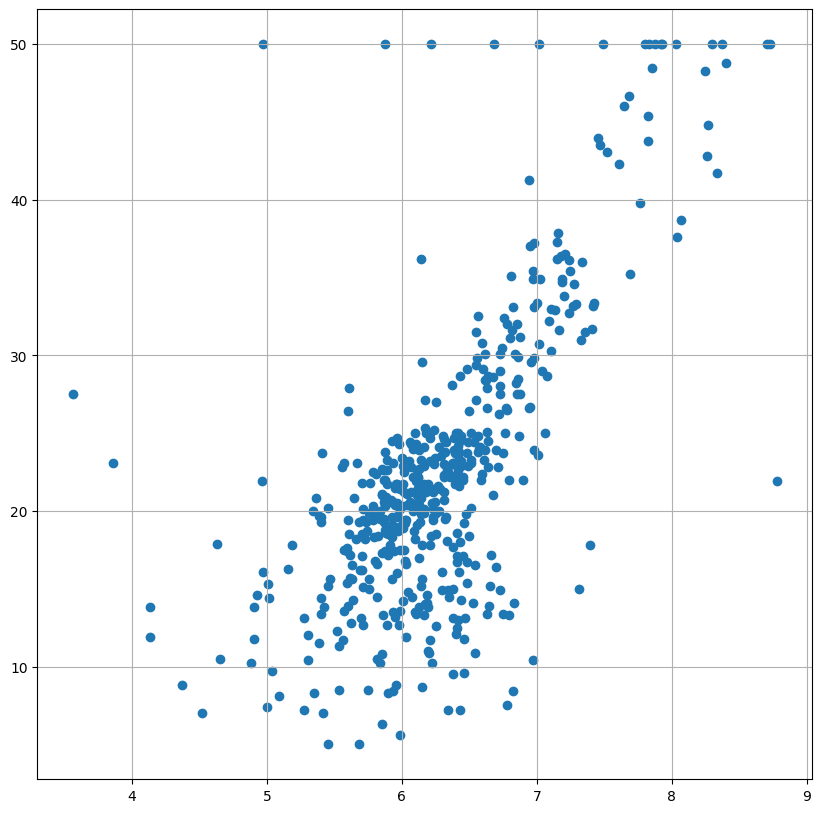

In [4]:
# We can see that feature 'RM', average number of rooms per dwelling,
# has a linear relationship with our target 'MEDV', Median value of owner-occupied homes in $1000's

fig, ax = plt.subplots(figsize=(10,10)) 
ax.scatter(df['RM'], df['MEDV']) # plot the data
ax.grid()
plt.show()


## Model Training

In [5]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [8]:
# notice that we need double square brackets to select X
# inner bracket is a list
# outer bracker accesses a subset of the original DataFrame
X_train = df[['RM']]
y_train = df['MEDV']

X_train.head()

y_train.head()


0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [9]:
# Convert to 2D numpy arrays for model training
X_train = X_train.values
y_train = y_train.values

# We need 2D arrays for x_train 
print(X_train.shape)
print(y_train.shape)

(506, 1)
(506,)


In [15]:
# instantiate a linear regression model
lModel = linear_model.LinearRegression()

# train the model to fit the training data, finding the coef and intercept
model = lModel.fit(X_train, y_train)

# Access intercept and coefficients
intercept = model.intercept_
coefficients = model.coef_

print("Intercept:", intercept)
print("Coefficients:", coefficients)

Intercept: -34.67062077643857
Coefficients: [9.10210898]


# Prediction

Now that we've trained our model, the next step is to predict the data.

Steps:

    Get predictions, 𝑦̂, using LinearRegression.predict()


In [21]:
# make predictions on the training data
y_pred_train = model.predict(X_train)
# the first 5 predicted values
print("First 5 predicted values:", '\n', y_pred_train[:5])

# We can do prediction based on single value
print(lModel.predict([[4.67]]))

y_pred = lModel.predict(X_train)

print("All predicted values:", '\n', y_pred)


First 5 predicted values: 
 [25.17574577 23.77402099 30.72803225 29.02593787 30.38215211]
[7.83622817]
All predicted values: 
 [25.17574577 23.77402099 30.72803225 29.02593787 30.38215211 23.85593997
 20.05125842 21.50759586 16.5833549  19.97844155 23.3735282  20.02395209
 18.93169901 19.47782555 20.81583557 18.43108302 19.35039603 19.85101202
 14.99048582 17.45715736 16.02812625 19.6234593  21.23453259 18.23993873
 19.25027283 16.29208741 18.23993873 20.36983223 24.44757706 26.07685456
 17.32972783 20.59738496 19.48692766 17.22050253 20.81583557 19.33219181
 18.49479778 18.57671676 19.63256141 25.35778795 29.26259271 26.95065703
 21.48028953 21.86257811 20.57007863 17.04756245 17.99418179 20.21509638
 14.47166561 16.31939374 19.60525508 20.98877564 24.5932108  19.92382889
 18.9225969  31.31056723 23.42814085 27.36935404 21.26183891 19.27757916
 17.58458688 19.63256141 24.09259481 26.87784015 29.99076143 22.58164472
 18.0032839  18.83157581 16.24657686 18.89529058 23.73761256 19.587050

# Model Validation

We want to see how well our model fits the data. r2-score should be as close to 1 as possible

In [22]:
# we can see the coefficient and intercept our model finds
print(lModel.coef_) # the 'slope'
print(lModel.intercept_) # the intercept
print(lModel.score(X_train, y_train))

[9.10210898]
-34.67062077643857
0.48352545599133423


As the r2-score isn't very close to 1, our linear regression model doesn't really fit the data well
We can visualize it to see what the model looks like

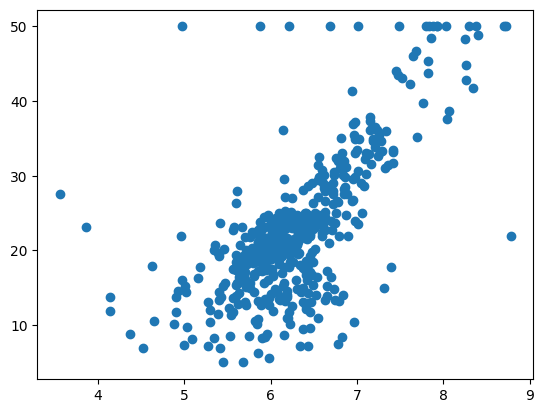

In [28]:
from sklearn.metrics import r2_score

r2_score(y_train, y_pred) 

plt.scatter(X_train[:, 0], y_train)
# plt.plot(X_train[:, 0], y_pred, color='red')
plt.show()

Plot the regression line (blue) vs the actual value (red)

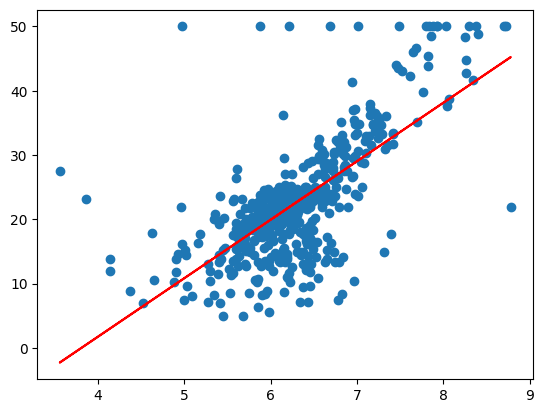

In [29]:
# We want to plot the regression line(blue) vs the actual value(red)
r2_score(y_train, y_pred) 

plt.scatter(X_train[:, 0], y_train)
plt.plot(X_train[:, 0], y_pred, color='red')
plt.show()

